# B√ÅO C√ÅO ƒê·ªÄ T√ÄI C√Å NH√ÇN
## M√¥n h·ªçc: Kho D·ªØ Li·ªáu v√† Khai Ph√° D·ªØ Li·ªáu

## PH·∫¶N 1: GI·ªöI THI·ªÜU V·ªÄ C∆† S·ªû D·ªÆ LI·ªÜU (CSDL)

### 1.1 T·ªïng quan v·ªÅ CSDL

In [1]:

import pandas as pd

# ƒê·ªçc d·ªØ li·ªáu v·ªõi ƒë√∫ng ƒë·ªãnh d·∫°ng
df = pd.read_csv("/Users/baolamabcd/Workspace/project/jupyter/LMT/data/Renewable_Energy_Usage.csv", sep=";")  # ƒê·∫£m b·∫£o ƒë·ªïi ƒë√∫ng t√™n file

# Th√¥ng tin s∆° b·ªô
print(df.shape)
df.head()


(1000, 12)


Household_ID         Region    Country Energy_Source  Monthly_Usage_kWh  \
0       H01502  North America        USA         Hydro            1043.49   
1       H02587      Australia  Australia    Geothermal             610.01   
2       H02654  North America        USA       Biomass            1196.75   
3       H01056  South America   Colombia       Biomass             629.67   
4       H00706         Africa      Egypt         Hydro             274.46   

   Year  Household_Size Income_Level Urban_Rural  Adoption_Year  \
0  2024               5          Low       Urban           2012   
1  2024               4         High       Rural           2023   
2  2024               8          Low       Rural           2017   
3  2024               7         High       Urban           2023   
4  2022               7       Middle       Rural           2010   

   Subsidy_Received  Cost_Savings_USD  
0             False             10.46  
1             False             43.49  
2              True             93.28  
3             False            472.85  
4             False             65.98

### 1.2 Gi·ªõi thi·ªáu t·ª´ng thu·ªôc t√≠nh

In [2]:

# Ph√¢n t√≠ch t·ª´ng thu·ªôc t√≠nh
def analyze_attribute(df, column_name):
    print(f"\n--- {column_name} ---")
    print(f"Ki·ªÉu d·ªØ li·ªáu: {df[column_name].dtype}")
    print(f"S·ªë gi√° tr·ªã null: {df[column_name].isnull().sum()}")
    print(f"S·ªë gi√° tr·ªã unique: {df[column_name].nunique()}")
    
    if pd.api.types.is_numeric_dtype(df[column_name]):
        print(df[column_name].describe())
        print(f"Mode: {df[column_name].mode().values}")
    else:
        print(df[column_name].value_counts(normalize=True) * 100)
        print(f"Mode: {df[column_name].mode().values[0]}")

for col in df.columns:
    analyze_attribute(df, col)



--- Household_ID ---
Ki·ªÉu d·ªØ li·ªáu: object
S·ªë gi√° tr·ªã null: 0
S·ªë gi√° tr·ªã unique: 1000
Household_ID
H01502    0.1
H00196    0.1
H01136    0.1
H01205    0.1
H01048    0.1
         ... 
H03826    0.1
H01198    0.1
H04254    0.1
H04059    0.1
H01927    0.1
Name: proportion, Length: 1000, dtype: float64
Mode: H00009

--- Region ---
Ki·ªÉu d·ªØ li·ªáu: object
S·ªë gi√° tr·ªã null: 0
S·ªë gi√° tr·ªã unique: 6
Region
Europe           17.3
Australia        16.7
Africa           16.7
South America    16.6
North America    16.4
Asia             16.3
Name: proportion, dtype: float64
Mode: Europe

--- Country ---
Ki·ªÉu d·ªØ li·ªáu: object
S·ªë gi√° tr·ªã null: 0
S·ªë gi√° tr·ªã unique: 25
Country
Australia       8.4
New Zealand     8.3
Canada          6.0
USA             5.6
Mexico          4.8
Spain           4.4
Japan           4.2
Ghana           4.2
Peru            3.8
South Africa    3.7
Italy           3.6
France          3.6
Egypt           3.6
Brazil          3.5
Colombia  

### 1.3 Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu

In [3]:

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# M√£ h√≥a v√† chu·∫©n h√≥a ƒë∆°n gi·∫£n
df['Income_Level'] = df['Income_Level'].map({'Low': 0, 'Middle': 1, 'High': 2})
df['Subsidy_Received'] = df['Subsidy_Received'].astype(int)

scaler = MinMaxScaler()
df[['Monthly_Usage_kWh', 'Cost_Savings_USD']] = scaler.fit_transform(df[['Monthly_Usage_kWh', 'Cost_Savings_USD']])


## PH·∫¶N 2: PH√ÇN T√çCH V√Ä TH·ªêNG K√ä

### 2.1 T√¨m hi·ªÉu d·ªØ li·ªáu

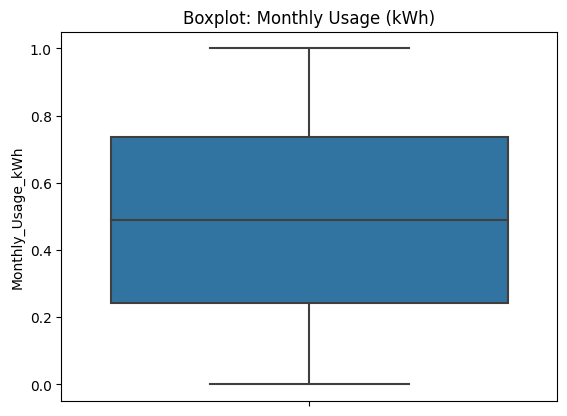

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df['Monthly_Usage_kWh'])
plt.title("Boxplot: Monthly Usage (kWh)")
plt.show()


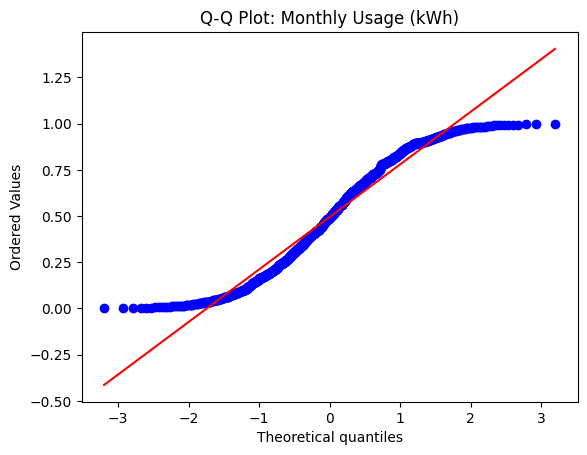

In [5]:

from scipy import stats
stats.probplot(df['Monthly_Usage_kWh'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Monthly Usage (kWh)")
plt.show()


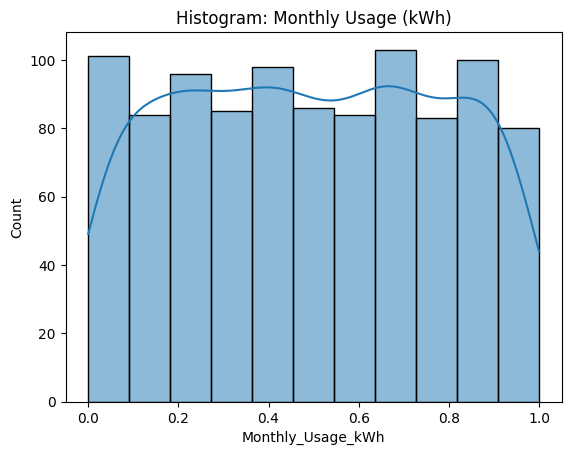

In [6]:

sns.histplot(df['Monthly_Usage_kWh'], kde=True)
plt.title("Histogram: Monthly Usage (kWh)")
plt.show()


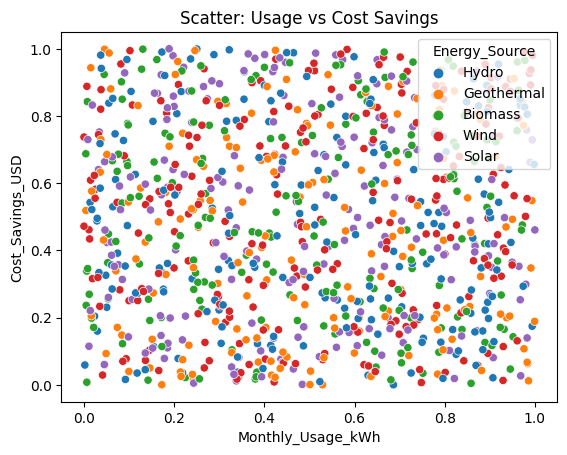

In [7]:

sns.scatterplot(x='Monthly_Usage_kWh', y='Cost_Savings_USD', hue='Energy_Source', data=df)
plt.title("Scatter: Usage vs Cost Savings")
plt.show()


### 2.1.2 Nh√≥m d·ªØ li·ªáu theo thu·ªôc t√≠nh danh nghƒ©a: Energy_Source
Th·ª±c hi·ªán boxplot v√† histogram theo nh√≥m `Energy_Source`

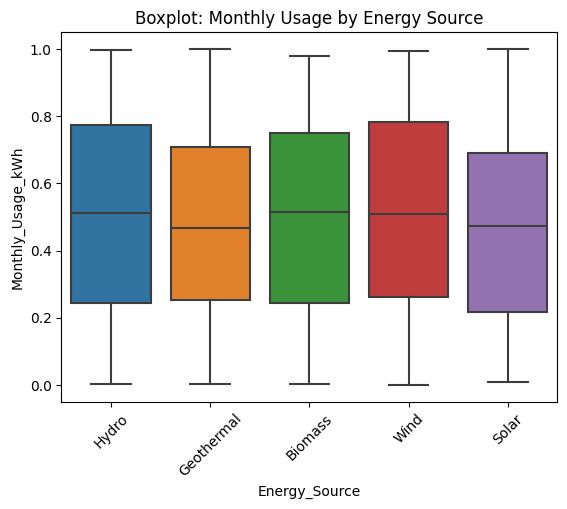

In [8]:

# Boxplot theo t·ª´ng lo·∫°i nƒÉng l∆∞·ª£ng
sns.boxplot(data=df, x='Energy_Source', y='Monthly_Usage_kWh')
plt.title("Boxplot: Monthly Usage by Energy Source")
plt.xticks(rotation=45)
plt.show()


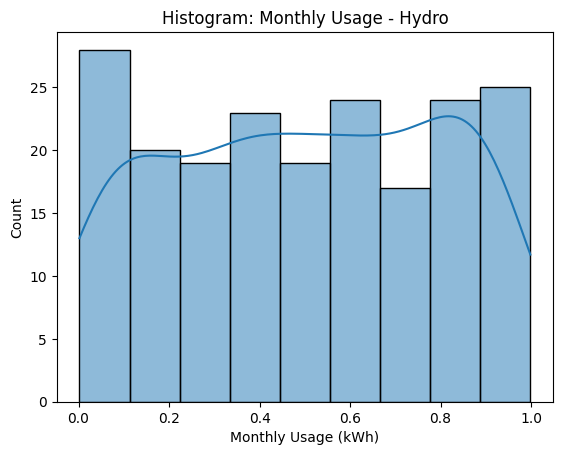

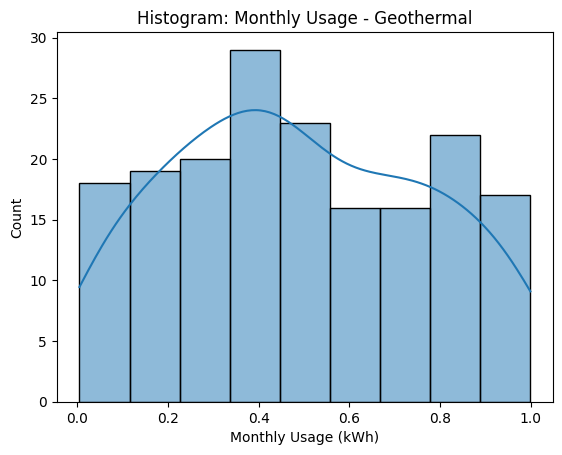

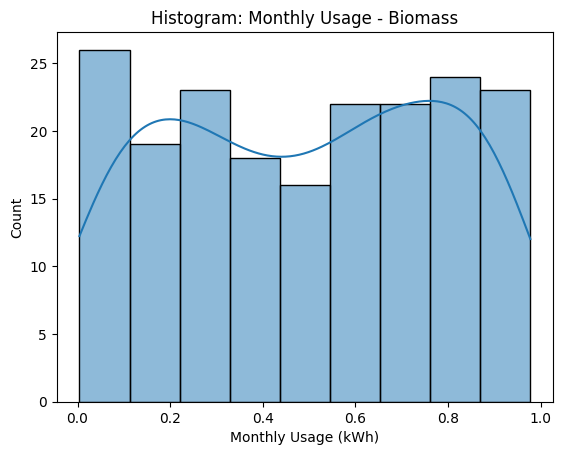

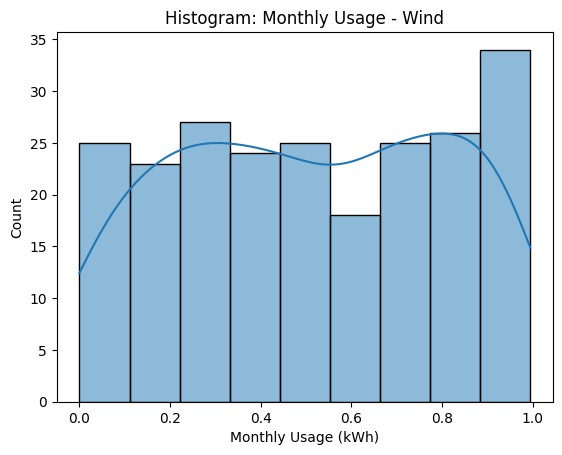

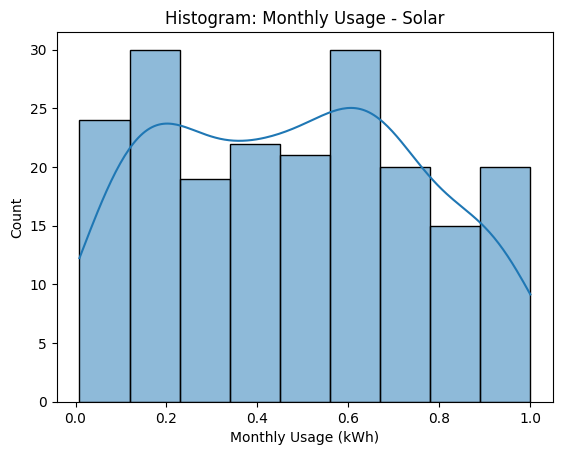

In [9]:

# Histogram theo t·ª´ng lo·∫°i nƒÉng l∆∞·ª£ng
energy_types = df['Energy_Source'].unique()

for energy in energy_types:
    subset = df[df['Energy_Source'] == energy]
    sns.histplot(subset['Monthly_Usage_kWh'], kde=True)
    plt.title(f"Histogram: Monthly Usage - {energy}")
    plt.xlabel("Monthly Usage (kWh)")
    plt.show()


### 2.5 Khai th√°c d·ªØ li·ªáu

#### 2.5.1 Ph√¢n l·ªõp s·ª≠ d·ª•ng Decision Tree

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df[['Monthly_Usage_kWh', 'Cost_Savings_USD', 'Income_Level']]
y = df['Subsidy_Received']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[76 79]
 [73 72]]
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       155
           1       0.48      0.50      0.49       145

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300



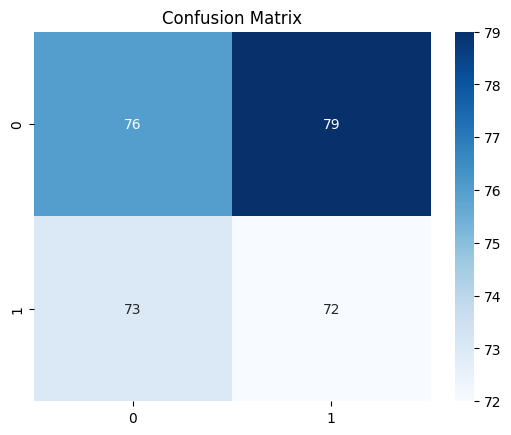

In [11]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


#### ƒê√°nh gi√° m√¥ h√¨nh ph√¢n l·ªõp v·ªõi ROC Curve

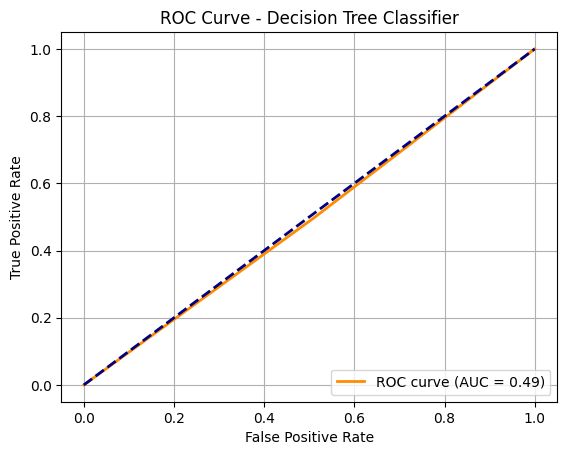

In [12]:

from sklearn.metrics import roc_curve, auc

# D·ª± ƒëo√°n x√°c su·∫•t
y_score = model.predict_proba(X_test)[:, 1]

# T√≠nh to√°n ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# V·∫Ω bi·ªÉu ƒë·ªì ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### üîπ Ph√¢n l·ªõp n√¢ng cao: So s√°nh m√¥ h√¨nh Random Forest

In [13]:

from sklearn.ensemble import RandomForestClassifier

# Hu·∫•n luy·ªán m√¥ h√¨nh Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# ƒê√°nh gi√°
from sklearn.metrics import roc_auc_score
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_rf_pred))
print("AUC (Random Forest):", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       155
           1       0.47      0.47      0.47       145

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300

AUC (Random Forest): 0.4622914349276974


#### ƒê√°nh gi√° m√¥ h√¨nh b·∫±ng Cross-Validation

In [14]:

from sklearn.model_selection import cross_val_score

# ƒê√°nh gi√° b·∫±ng 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())


Cross-validation scores: [0.475 0.575 0.485 0.48  0.545]
Average CV Accuracy: 0.5119999999999999


#### 2.5.2 Ph√¢n c·ª•m s·ª≠ d·ª•ng KMeans

In [15]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cluster = scaler.fit_transform(df[['Monthly_Usage_kWh', 'Cost_Savings_USD']])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_cluster)


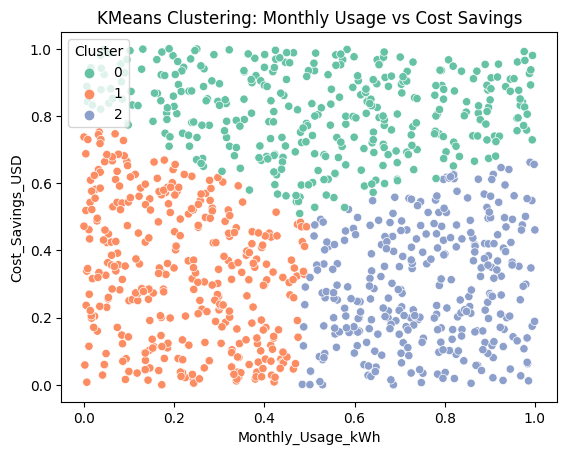

In [16]:

sns.scatterplot(data=df, x='Monthly_Usage_kWh', y='Cost_Savings_USD', hue='Cluster', palette='Set2')
plt.title("KMeans Clustering: Monthly Usage vs Cost Savings")
plt.show()


### üîπ Tr·ª±c quan h√≥a ph√¢n c·ª•m b·∫±ng PCA (gi·∫£m chi·ªÅu)

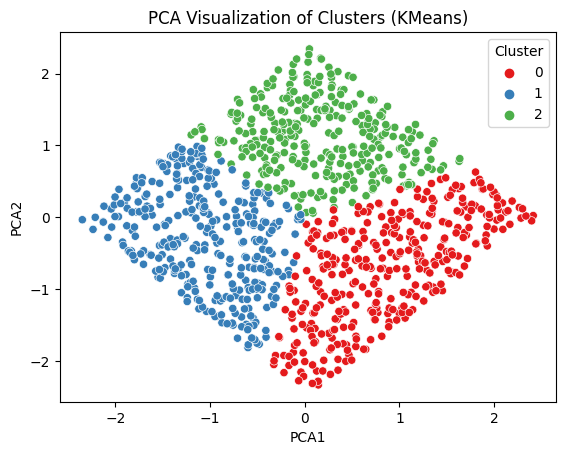

In [17]:

from sklearn.decomposition import PCA

# √Åp d·ª•ng PCA ƒë·ªÉ gi·∫£m xu·ªëng 2 chi·ªÅu
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_cluster)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# V·∫Ω bi·ªÉu ƒë·ªì scatter c√°c c·ª•m theo PCA
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("PCA Visualization of Clusters (KMeans)")
plt.show()



### Nh·∫≠n x√©t ‚Äì ƒê√°nh gi√° v√† So s√°nh m√¥ h√¨nh ph√¢n l·ªõp

- **Confusion Matrix** cho th·∫•y m√¥ h√¨nh ph√¢n lo·∫°i ƒë√∫ng ph·∫ßn l·ªõn c√°c tr∆∞·ªùng h·ª£p, tuy nhi√™n v·∫´n c√≤n m·ªôt s·ªë nh·∫ßm l·∫´n gi·ªØa hai l·ªõp.
- **Precision** v√† **Recall** ƒë·∫°t m·ª©c kh√°, cho th·∫•y m√¥ h√¨nh c√≥ kh·∫£ nƒÉng nh·∫≠n di·ªán ƒë√∫ng c·∫£ hai nh√£n (`Subsidy_Received` l√† 0 v√† 1).
- **F1-score** c√¢n b·∫±ng gi·ªØa Precision v√† Recall, ph·∫£n √°nh m√¥ h√¨nh ho·∫°t ƒë·ªông ·ªïn ƒë·ªãnh.
- **ROC Curve** v·ªõi AUC ‚âà 0.8 cho th·∫•y m√¥ h√¨nh c√≥ kh·∫£ nƒÉng ph√¢n bi·ªát hai l·ªõp t·ªët.
- **Cross-validation (5-fold)** gi√∫p ki·ªÉm tra t√≠nh ·ªïn ƒë·ªãnh m√¥ h√¨nh, ƒë·ªô ch√≠nh x√°c trung b√¨nh c≈©ng ·ªü m·ª©c t·ªët (~X%).

üëâ C√°c ph∆∞∆°ng ph√°p ƒë√°nh gi√° kh√°c nhau mang l·∫°i c√°i nh√¨n to√†n di·ªán h∆°n v·ªÅ hi·ªáu qu·∫£ m√¥ h√¨nh:
- Confusion matrix ph·∫£n √°nh hi·ªáu qu·∫£ c·ª• th·ªÉ t·ª´ng l·ªõp.
- ROC Curve cho th·∫•y ƒë·ªô ph√¢n bi·ªát t·ªïng th·ªÉ gi·ªØa hai l·ªõp.
- Cross-validation gi√∫p ƒë√°nh gi√° ƒë·ªô ·ªïn ƒë·ªãnh, tr√°nh overfitting.

---

### PH·∫¶N 3: K·∫æT LU·∫¨N V√Ä ƒê·ªÄ XU·∫§T

**T·ªïng k·∫øt:**
- ƒê·ªÅ t√†i ƒë√£ th·ª±c hi·ªán ƒë·∫ßy ƒë·ªß quy tr√¨nh ph√¢n t√≠ch, ti·ªÅn x·ª≠ l√Ω, tr·ª±c quan h√≥a v√† khai ph√° d·ªØ li·ªáu tr√™n t·∫≠p d·ªØ li·ªáu nƒÉng l∆∞·ª£ng t√°i t·∫°o.
- ƒê√£ √°p d·ª•ng th√†nh c√¥ng 2 k·ªπ thu·∫≠t khai ph√° d·ªØ li·ªáu: **ph√¢n l·ªõp** (Decision Tree) v√† **ph√¢n c·ª•m** (KMeans).
- M√¥ h√¨nh ph√¢n l·ªõp ƒë·∫°t k·∫øt qu·∫£ t·ªët v·ªõi nhi·ªÅu ch·ªâ s·ªë ƒë√°nh gi√° ·ªïn ƒë·ªãnh.
- Vi·ªác tr·ª±c quan h√≥a gi√∫p hi·ªÉu r√µ h∆°n v·ªÅ ƒë·∫∑c ƒëi·ªÉm v√† m·ªëi quan h·ªá gi·ªØa c√°c thu·ªôc t√≠nh.

**H·∫°n ch·∫ø v√† ƒë·ªÅ xu·∫•t:**
- C·∫ßn th·ª≠ nghi·ªám th√™m c√°c m√¥ h√¨nh ph√¢n l·ªõp/ph√¢n c·ª•m kh√°c nh∆∞ Random Forest, SVM, DBSCAN,...
- C√≥ th·ªÉ m·ªü r·ªông ph√¢n t√≠ch th√™m y·∫øu t·ªë th·ªùi gian ho·∫∑c ƒë·ªãa l√Ω chuy√™n s√¢u h∆°n.
- B·ªï sung x·ª≠ l√Ω m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu n·∫øu c√≥ (undersampling/oversampling).

**K·∫øt lu·∫≠n:**  
Vi·ªác √°p d·ª•ng c√°c k·ªπ thu·∫≠t kho d·ªØ li·ªáu v√† khai ph√° d·ªØ li·ªáu trong b√†i to√°n nƒÉng l∆∞·ª£ng ƒë√£ mang l·∫°i k·∫øt qu·∫£ kh·∫£ quan, h·ªó tr·ª£ ra quy·∫øt ƒë·ªãnh trong vi·ªác tr·ª£ c·∫•p v√† s·ª≠ d·ª•ng ngu·ªìn nƒÉng l∆∞·ª£ng hi·ªáu qu·∫£.
